# Building Classifier for MNIST Fashion Dataset

Developer: Tejas Yuvraj Kamble   B211066  
Email-Id: tejask0512@gmail.com

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_data(data_sample):
        plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='Greys')

In [3]:
train_dataset = datasets.FashionMNIST(
root = './data/FashionMNIST',
download = True,
train = True,
transform = transforms.Compose([
transforms.ToTensor(),
])
)


In [4]:
train_dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data/FashionMNIST
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [5]:
test_dataset= datasets.FashionMNIST(
root = './data/FashionMNIST',
download=True,
train=False,
transform = transforms.Compose([transforms.ToTensor()])
)

In [6]:
test_dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data/FashionMNIST
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

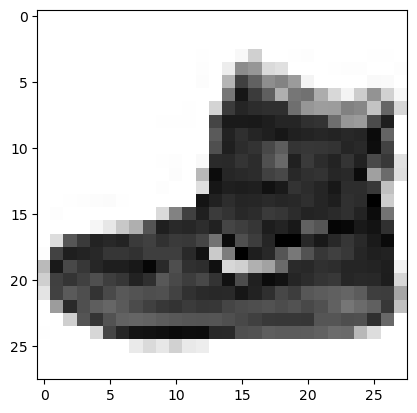

In [7]:
show_data(train_dataset[0])

None


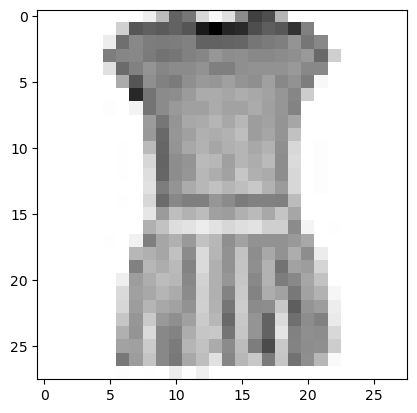

In [8]:
print(show_data(train_dataset[3]))

In [9]:
print(train_dataset.class_to_idx)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [10]:
print(train_dataset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


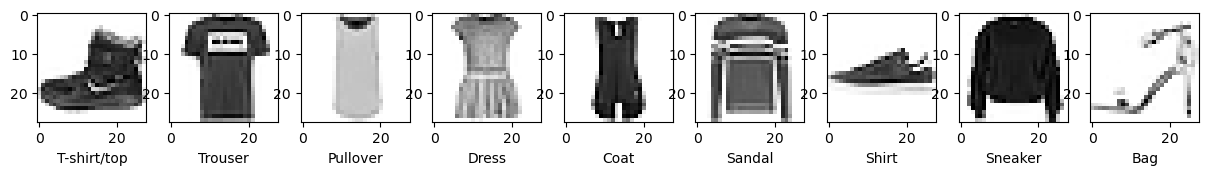

In [11]:
plt.figure(figsize=(15,15))
for i in range(len(train_dataset.classes)-1):
    plt.subplot(9,9,i+1)
    plt.grid(False)
    plt.xlabel(train_dataset.classes[i])
    plt.imshow(train_dataset.data[i],cmap='Greys')
plt.show()


## Define the Softmax Classifier, Criterion Function, Optimizer, and Train the Model

In [23]:
class SoftMax(nn.Module):
    #constructor
    def __init__(self,input_size,output_size):
        super(SoftMax,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    #used for prediction   
    def forward(self,x):
        z=self.linear(x)
        return z

In [24]:
input_dim = 28 * 28
output_dim = 10

In [25]:
# Create the model
# Input dim is 28*28 which is the image converted to a tensor
# Output dim is 10 because there are 10 classes available

model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [26]:
print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


In [28]:
#  X value of the first image
X = train_dataset[0][0]

# We can see the shape is 1 by 28 by 28, we need it to be flattened to 1 by 28 * 28 (784)

print(X.shape)
X = X.view(-1, 28*28)
print(X.shape)
 
model(X)

torch.Size([1, 28, 28])
torch.Size([1, 784])


tensor([[-0.0062,  0.0974, -0.2317,  0.2657,  0.2915,  0.2543, -0.1666,  0.3737,
         -0.2819, -0.7221]], grad_fn=<AddmmBackward0>)

In [30]:
learning_rate = 0.1
# The optimizer will updates the model parameters using the learning rate 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# The criterion will measure the loss between the prediction and actual label values
criterion = nn.CrossEntropyLoss()

# Created a training data loader so we can set the batch size
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)

# Created a validation data loader so we can set the batch size
validation_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=5000)

### How Cross Entropy Loss uses SoftMax

Output:  tensor([[-0.0062,  0.0974, -0.2317,  0.2657,  0.2915,  0.2543, -0.1666,  0.3737,
         -0.2819, -0.7221]], grad_fn=<AddmmBackward0>)
Actual: tensor([9])


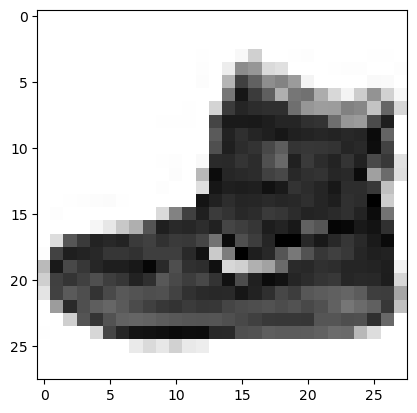

In [31]:
model_output = model(X)
actual = torch.tensor([train_dataset[0][1]])

show_data(train_dataset[0])
print("Output: ", model_output)
print("Actual:", actual)

In [32]:
criterion(model_output, actual)

tensor(3.0602, grad_fn=<NllLossBackward0>)

In [33]:
softmax = nn.Softmax(dim=1)
probability = softmax(model_output)
print(probability)

tensor([[0.0959, 0.1064, 0.0766, 0.1259, 0.1292, 0.1245, 0.0817, 0.1402, 0.0728,
         0.0469]], grad_fn=<SoftmaxBackward0>)


In [34]:
-1*torch.log(probability[0][actual])

tensor([3.0602], grad_fn=<MulBackward0>)

## Training the model

In [37]:
n_epochs = 10
# Lists to keep track of loss and accuracy
loss_list = []
accuracy_list = []
# Size of the validation data
N_test = len(test_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x,y in train_loader:
            optimizer.zero_grad()
            z=model(x.view(-1,28*28))
            loss=criterion(z,y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        for x_test, y_test in validation_loader:
            # Makes prediction based on image tensor
            z = model(x_test.view(-1, 28 * 28))
            # Finds the class with the higest output
            _, yhat = torch.max(z.data, 1)
            # Checks if the prediction matches the actual class and increments correct if it does
            correct += (yhat == y_test).sum().item()
        # Calculates the accuracy by dividing correct by size of validation dataset
        accuracy = correct / N_test
        # Keeps track loss
        loss_list.append(loss.data)
        # Keeps track of the accuracy
        accuracy_list.append(accuracy)

# Function call
train_model(n_epochs)

traning process will take few minutes

##  Analyzing the results

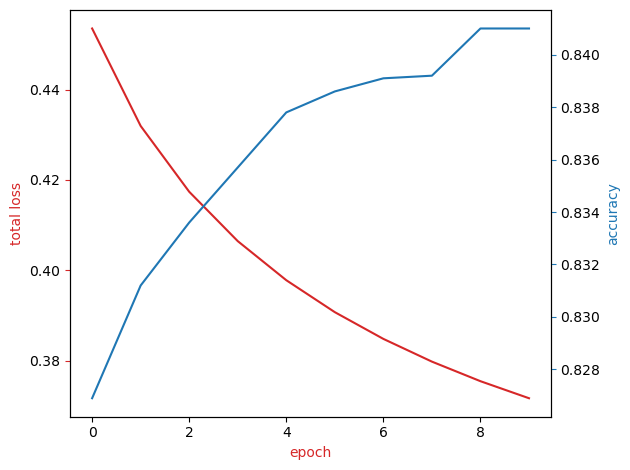

In [38]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()